In [117]:
import pandas as pd

In [118]:
df_exp_data = pd.read_csv("simple_amino.csv")
df_true_data = pd.read_csv("single_mut_effects.csv")

In [119]:
exp_muts = df_exp_data["mutations"]

In [120]:
true_muts = df_true_data["mutation"]

In [121]:
#exp_muts = df_exp_data["mutations"]

In [122]:
df_true_data

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
0,1,331,N,A,N331A,N1A,-0.05,-0.02,-0.03,-0.14,-0.08,-0.11
1,1,331,N,C,N331C,N1C,-0.08,-0.10,-0.09,-1.56,-0.97,-1.26
2,1,331,N,D,N331D,N1D,0.00,0.07,0.03,-0.75,-0.12,-0.44
3,1,331,N,E,N331E,N1E,0.02,-0.02,0.00,-0.39,-0.24,-0.31
4,1,331,N,F,N331F,N1F,-0.03,-0.16,-0.10,-0.83,-0.57,-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...
4216,201,531,T,T,T531T,T201T,0.00,0.00,0.00,0.00,0.00,0.00
4217,201,531,T,V,T531V,T201V,0.03,-0.02,0.01,-0.07,-0.05,-0.06
4218,201,531,T,W,T531W,T201W,0.02,-0.06,-0.02,-0.13,-0.04,-0.08
4219,201,531,T,Y,T531Y,T201Y,0.00,-0.03,-0.01,-0.03,-0.08,-0.05


In [123]:
df_true_data.describe()


,site_RBD,site_SARS2,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
count,4221.000000,4221.000000,3994.000000,3991.000000,4003.000000,4183.000000,4184.000000,4198.000000
mean,101.000000,431.000000,-0.920441,-0.968637,-0.943600,-1.203875,-1.166883,-1.184726
std,58.029858,58.029858,1.389299,1.412122,1.391609,1.273002,1.233323,1.243281
min,1.000000,331.000000,-4.760000,-4.840000,-4.840000,-4.710000,-4.650000,-4.650000
25%,51.000000,381.000000,-1.080000,-1.230000,-1.140000,-2.200000,-2.120000,-2.150000
50%,101.000000,431.000000,-0.255000,-0.300000,-0.280000,-0.740000,-0.730000,-0.740000
75%,151.000000,481.000000,-0.040000,-0.050000,-0.050000,-0.125000,-0.140000,-0.140000
max,201.000000,531.000000,0.360000,0.380000,0.300000,0.920000,1.000000,0.990000


In [124]:
import numpy as np


    

In [125]:
true_muts_np= true_muts.to_numpy()

In [126]:
true_muts_np

array(['N331A', 'N331C', 'N331D', ..., 'T531W', 'T531Y', 'T531*'],
      dtype=object)

In [127]:
idx= []  
for mut in exp_muts : 
    idx.append(np.where(true_muts_np == mut )[0][0] ) 

get data we want : 

In [128]:


#try with site_SARS2_val


site_SARS2_val = df_true_data.iloc[idx]["bind_avg"].to_numpy() #changed from expr_avg to site_SARS2
site_SARS2_val_converted = 298*1.98*1e-3 * np.log( 10 ) *site_SARS2_val 

In [129]:
#finding deltaGdeg :

R = 1.98*1e-3
T =298
K_D_app = 3.9*1e-11

delta_g_deg = R * T * np.log(K_D_app)
delta_g_deg

-14.141759785560145

In [130]:
#try with div in the log:

tmp_K_mut = 10**(site_SARS2_val) * K_D_app
delta_g_othermethod = R * T * np.log(tmp_K_mut)
delta_g_othermethod

array([-14.68520671, -15.31017067, -14.60368967, -14.83465461,
       -14.5357588 , -20.66312287, -17.08995934, -17.33451046,
       -14.22327682, -14.08741509, -15.03844721, -15.28299832,
       -14.35913855, -15.4460324 , -17.48395836, -14.65803436,
       -15.90796229, -15.50037709, -14.08741509, -14.68520671,
       -14.78030992, -20.66312287, -19.34526408, -17.44319984,
       -15.11996425, -14.1825183 , -14.29120769, -15.32375684,
       -14.54934498, -14.20969065, -15.16072277, -14.16893213,
       -15.96230698, -16.28837513, -13.99231188, -18.2719564 ,
       -15.45961857, -15.48679092, -14.49500029, -15.26941215,
       -14.19610448, -17.10354552, -14.943344  , -15.26941215,
       -18.40781813, -15.20148129, -16.72313267, -14.15534596,
       -15.32375684, -15.02486104, -20.41857175, -15.07920573,
       -14.236863  , -15.06561956, -14.25044917, -15.31017067,
       -14.26403534, -14.50858646, -14.5357588 , -19.65774606,
       -14.10100127, -14.07382892, -16.12534106])

In [131]:
del_del_g_total =   delta_g_othermethod - delta_g_deg #i think signs are right here: 
del_del_g_total

array([-0.54344692, -1.16841089, -0.46192988, -0.69289483, -0.39399902,
       -6.52136308, -2.94819956, -3.19275067, -0.08151704,  0.05434469,
       -0.89668742, -1.14123854, -0.21737877, -1.30427262, -3.34219858,
       -0.51627458, -1.7662025 , -1.35861731,  0.05434469, -0.54344692,
       -0.63855013, -6.52136308, -5.20350429, -3.30144006, -0.97820446,
       -0.04075852, -0.1494479 , -1.18199706, -0.40758519, -0.06793087,
       -1.01896298, -0.02717235, -1.82054719, -2.14661535,  0.1494479 ,
       -4.13019662, -1.31785879, -1.34503114, -0.3532405 , -1.12765237,
       -0.05434469, -2.96178573, -0.80158421, -1.12765237, -4.26605835,
       -1.0597215 , -2.58137289, -0.01358617, -1.18199706, -0.88310125,
       -6.27681196, -0.93744594, -0.09510321, -0.92385977, -0.10868938,
       -1.16841089, -0.12227556, -0.36682667, -0.39399902, -5.51598627,
        0.04075852,  0.06793087, -1.98358127])

In [132]:
# site_SARS2_val*298*1.98*10e-3
delta_K = site_SARS2_val
#try: 
del_del_trial = R * T * np.log(K_D_app * ( 10**delta_K + K_D_app ) ) 

In [133]:
del_del_trial

array([-14.68520671, -15.31017067, -14.60368967, -14.83465461,
       -14.5357588 , -20.66312141, -17.08995934, -17.33451045,
       -14.22327682, -14.08741509, -15.03844721, -15.28299832,
       -14.35913855, -15.4460324 , -17.48395836, -14.65803436,
       -15.90796229, -15.50037709, -14.08741509, -14.68520671,
       -14.78030992, -20.66312141, -19.34526392, -17.44319984,
       -15.11996425, -14.1825183 , -14.29120769, -15.32375684,
       -14.54934498, -14.20969065, -15.16072277, -14.16893213,
       -15.96230698, -16.28837513, -13.99231188, -18.27195638,
       -15.45961857, -15.48679092, -14.49500029, -15.26941215,
       -14.19610448, -17.10354551, -14.943344  , -15.26941215,
       -18.4078181 , -15.20148129, -16.72313267, -14.15534596,
       -15.32375684, -15.02486104, -20.41857079, -15.07920573,
       -14.236863  , -15.06561956, -14.25044917, -15.31017067,
       -14.26403534, -14.50858646, -14.5357588 , -19.65774579,
       -14.10100127, -14.07382892, -16.12534105])

In [134]:
site_SARS2_val_converted

array([-0.54344692, -1.16841089, -0.46192988, -0.69289483, -0.39399902,
       -6.52136308, -2.94819956, -3.19275067, -0.08151704,  0.05434469,
       -0.89668742, -1.14123854, -0.21737877, -1.30427262, -3.34219858,
       -0.51627458, -1.7662025 , -1.35861731,  0.05434469, -0.54344692,
       -0.63855013, -6.52136308, -5.20350429, -3.30144006, -0.97820446,
       -0.04075852, -0.1494479 , -1.18199706, -0.40758519, -0.06793087,
       -1.01896298, -0.02717235, -1.82054719, -2.14661535,  0.1494479 ,
       -4.13019662, -1.31785879, -1.34503114, -0.3532405 , -1.12765237,
       -0.05434469, -2.96178573, -0.80158421, -1.12765237, -4.26605835,
       -1.0597215 , -2.58137289, -0.01358617, -1.18199706, -0.88310125,
       -6.27681196, -0.93744594, -0.09510321, -0.92385977, -0.10868938,
       -1.16841089, -0.12227556, -0.36682667, -0.39399902, -5.51598627,
        0.04075852,  0.06793087, -1.98358127])

In [135]:
import matplotlib.pyplot as plt

In [136]:
exp_66 = df_exp_data["delta_delta_g_gen_66"].to_numpy()

In [137]:
site_SARS2_val_converted,exp_66 , del_del_g_total

(array([-0.54344692, -1.16841089, -0.46192988, -0.69289483, -0.39399902,
        -6.52136308, -2.94819956, -3.19275067, -0.08151704,  0.05434469,
        -0.89668742, -1.14123854, -0.21737877, -1.30427262, -3.34219858,
        -0.51627458, -1.7662025 , -1.35861731,  0.05434469, -0.54344692,
        -0.63855013, -6.52136308, -5.20350429, -3.30144006, -0.97820446,
        -0.04075852, -0.1494479 , -1.18199706, -0.40758519, -0.06793087,
        -1.01896298, -0.02717235, -1.82054719, -2.14661535,  0.1494479 ,
        -4.13019662, -1.31785879, -1.34503114, -0.3532405 , -1.12765237,
        -0.05434469, -2.96178573, -0.80158421, -1.12765237, -4.26605835,
        -1.0597215 , -2.58137289, -0.01358617, -1.18199706, -0.88310125,
        -6.27681196, -0.93744594, -0.09510321, -0.92385977, -0.10868938,
        -1.16841089, -0.12227556, -0.36682667, -0.39399902, -5.51598627,
         0.04075852,  0.06793087, -1.98358127]),
 array([-3.6300e-02,  5.0000e-03, -4.2699e+00,  6.6000e-03,  1.5000e-03,
  

In [138]:
# convert delta log_10(Kd) -> Kd (for now assume to ignore the delta)

error = abs(del_del_g_total - exp_66)
error

array([5.07146923e-01, 1.17341089e+00, 3.80797012e+00, 6.99494827e-01,
       3.95499019e-01, 6.54116308e+00, 7.09300441e-01, 3.15445067e+00,
       1.38782962e-01, 4.17446923e-02, 8.70787423e-01, 1.04303854e+00,
       2.23678769e-01, 1.29637262e+00, 3.33390142e+00, 5.28774577e-01,
       6.67289750e+00, 1.33161731e+00, 4.27446923e-02, 5.28646923e-01,
       5.89501349e-02, 6.38756308e+00, 5.20740429e+00, 5.58965994e+00,
       9.82204462e-01, 6.32414808e-02, 1.63447904e-01, 1.15239706e+00,
       4.11285192e-01, 7.96308654e-02, 1.02026298e+00, 4.17723462e-02,
       1.82094719e+00, 2.14511535e+00, 1.42247904e-01, 4.12929662e+00,
       1.32995879e+00, 1.34923114e+00, 3.60540500e-01, 1.12635237e+00,
       8.44692331e-04, 2.16278573e+00, 8.07184212e-01, 1.13465237e+00,
       4.27155835e+00, 1.06352150e+00, 2.58057289e+00, 2.09861731e-02,
       1.18089706e+00, 8.94001250e-01, 6.27721196e+00, 8.31045943e-01,
       1.02903212e-01, 8.45459770e-01, 1.19389385e-01, 1.16271089e+00,
      

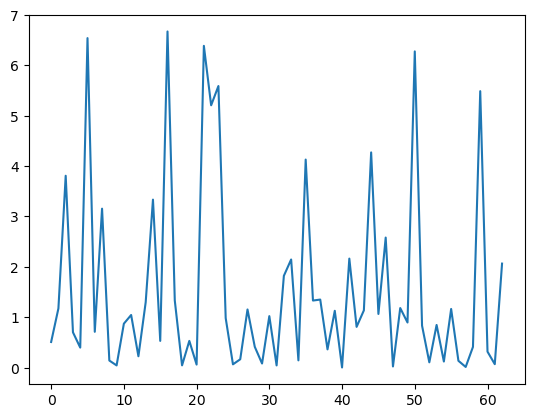

In [139]:
plt.plot(error)

In [140]:
error.mean()

1.5642238014365513

In [145]:
true_muts_np
type(error)

numpy.ndarray

In [149]:
len(true_muts_np)

4221

In [148]:
#error_df = pd.DataFrame({"mutations" :true_muts_np , "error" : error})

ValueError: All arrays must be of the same length